<a href="https://colab.research.google.com/github/Sam31551/Python/blob/main/APA_NLP_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing </a>

## Assignment: K Nearest Neighbors Model for the IMDB Movie Review Dataset

For the final project, build a K Nearest Neighbors model to predict the sentiment (positive or negative) of movie reviews. The dataset is originally hosted here: http://ai.stanford.edu/~amaas/data/sentiment/

Use the notebooks from the class and implement the model, train and test with the corresponding datasets.

You can follow these steps:
1. Read training-test data (Given)
2. Train a KNN classifier (Implement)
3. Make predictions on your test dataset (Implement)

__You can use the KNN Classifier from here: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html__

## 1. Reading the dataset

We will use the __pandas__ library to read our dataset. 

#### __Training data:__
Let's read our training data. Here, we have the text and label fields. Labe is 1 for positive reviews and 0 for negative reviews.

In [1]:
import pandas as pd

train_df = pd.read_csv('https://raw.githubusercontent.com/aws-samples/aws-machine-learning-university-accelerated-nlp/master/data/final_project/imdb_train.csv', header=0)

,text,label
0,This movie makes me want to throw up every tim...,0
1,Listening to the director's commentary confirm...,0
2,One of the best Tarzan films is also one of it...,1
3,Valentine is now one of my favorite slasher fi...,1
4,No mention if Ann Rivers Siddons adapted the m...,0


#### __Test data:__

In [2]:
import pandas as pd

test_df = pd.read_csv('https://raw.githubusercontent.com/aws-samples/aws-machine-learning-university-accelerated-nlp/master/data/final_project/imdb_test.csv', header=0)

,text,label
0,What I hoped for (or even expected) was the we...,0
1,Garden State must rate amongst the most contri...,0
2,There is a lot wrong with this film. I will no...,1
3,"To qualify my use of ""realistic"" in the summar...",1
4,Dirty War is absolutely one of the best politi...,1


## 2. Train a KNN Classifier
Here, you will apply pre-processing operations we covered in the class. Then, you can split your dataset to training and validation here. For your first submission, you will use __K Nearest Neighbors Classifier__. It is available [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

# **Simple Text Pre-Processing**

In [3]:
#Remove Whitespace
train_df['text'] = train_df['text'].str.strip()

,text,label
0,This movie makes me want to throw up every tim...,0
1,Listening to the director's commentary confirm...,0
2,One of the best Tarzan films is also one of it...,1
3,Valentine is now one of my favorite slasher fi...,1
4,No mention if Ann Rivers Siddons adapted the m...,0


In [4]:
# Make text lowercase
train_df['text'] = train_df['text'].str.lower()

,text,label
0,this movie makes me want to throw up every tim...,0
1,listening to the director's commentary confirm...,0
2,one of the best tarzan films is also one of it...,1
3,valentine is now one of my favorite slasher fi...,1
4,no mention if ann rivers siddons adapted the m...,0


In [5]:
#Remove Whitespace
test_df['text'] = test_df['text'].str.strip()

,text,label
0,What I hoped for (or even expected) was the we...,0
1,Garden State must rate amongst the most contri...,0
2,There is a lot wrong with this film. I will no...,1
3,"To qualify my use of ""realistic"" in the summar...",1
4,Dirty War is absolutely one of the best politi...,1


In [6]:
# Make text lowercase
test_df['text'] = test_df['text'].str.lower()

,text,label
0,what i hoped for (or even expected) was the we...,0
1,garden state must rate amongst the most contri...,0
2,there is a lot wrong with this film. i will no...,1
3,"to qualify my use of ""realistic"" in the summar...",1
4,dirty war is absolutely one of the best politi...,1


In [7]:
Y_train = train_df[["label"]].values.tolist()


In [8]:
X_train = train_df[["text"]].values.tolist()


In [9]:
X_test = test_df[["text"]].values.tolist()


In [10]:
Y_test = test_df[["label"]].values.tolist()

In [11]:
#Remove all punctuation
import re, string
X_train_2 = []
for i in X_train:
  for x in i:
    x = re.compile('<.*?>').sub('', x)
    x = re.compile('[%s]' % re.escape(string.punctuation)).sub('', x)
  X_train_2.append(i)

In [13]:
#Remove all punctuation
import re, string
X_test_2 = []
for i in X_test:
  for x in i:
    x = re.compile('<.*?>').sub('', x)
    x = re.compile('[%s]' % re.escape(string.punctuation)).sub('', x)
  X_test_2.append(i)

In [15]:
X_test = X_test_2

In [16]:
X_test_2 = []
for i in X_test:
  for x in i:
    new_string = x.translate(str.maketrans(' ', ' ', string.punctuation))
    new_string = new_string.replace('br br', "")
    X_test_2.append(new_string)

In [18]:
X_train = X_train_2

In [19]:
X_train_2 = []
for i in X_train:
  for x in i:
    new_string = x.translate(str.maketrans(' ', ' ', string.punctuation))
    new_string = new_string.replace('br br', "")
    X_train_2.append(new_string)

# **Lexicon-based text processing**

In [21]:
import nltk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [22]:
# We will use a tokenizer from the NLTK library

from nltk.tokenize import word_tokenize

Stop Word Removal

In [23]:
X_train = X_train_2
X_train[0]

'this movie makes me want to throw up every time i see it if you take the first movie and reverse the plot ariel wants to leave the sea her daughter wants to go to the sea take the same characters and give them new animals and new names and then throw in crappy animation and the biggest suck factor possible you get the little mermaid 2 its basically a copy of the first movie with a reversed plot ill take you through the horror of it step by step these are the people from the 1st movie first of all prince eric is still prince eric with about 3 lines in the whole movie ariel is uptight annoying and is not the carefree headstrong spirit we saw in the 1st in fact she is the exact opposite sebastian is still sebastian only less cute less convincing as being stressed out and the jokes just arent funny anymore flounder has about 2 lines he now has kids and he talks with a dumb nasal voice scuttle is still dumb scuttle only not funny king tritons character is probably the best he still retains

In [24]:
X_test = X_test_2
X_test[0]

'what i hoped for or even expected was the well known stop motion imagery and extreme slow motions extreme zooms and all embracing fish eye takes in short the art of a finding interesting visual events and b capturing them in a way the human eye is not capable of to be replayed so that the human eye can see the stuff that made the other qatsis hits i just wondered how the creation of the whole would fit the title having watched the movie i got the feeling that the focus in this third part was on the message and not on the wrapping thats fine especially since the message is so valid but i already knew the message and it appeared there was nothing else left for me more then half the film was solarized or colorized or posterized or transformed through some other filter it looked a lot like the effects your video camera does but you never use a lot of the images would have been prettier without the filters like the giraffe and zebra chase you could say that technology or whatever human bas

In [25]:
Y_train[0]

[0]

In [26]:
Y_test[0]

[0]

In [29]:
import pandas as pd
x_train = pd.DataFrame(X_train)
x_train.to_csv('X_train.csv')

In [30]:
Y_train = pd.DataFrame(Y_train)
Y_train.to_csv('Y_train.csv')

In [31]:
x_test = pd.DataFrame(X_test)
x_test.to_csv('X_test.csv')

In [32]:
Y_test = pd.DataFrame(Y_test)
Y_test.to_csv('Y_test.csv')

In [27]:
import nltk
from nltk.corpus import stopwords
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
#sourced from https://towardsdatascience.com/text-pre-processing-stop-words-removal-using-different-libraries-f20bac19929a#:~:text=%F0%9F%A4%94,much%20information%20to%20the%20text.
filtered_sentence = []
X_test_3 = []
for i in X_test:
  words = word_tokenize(i)
  for w in words:
    if w not in stop_words:
      filtered_sentence.append(w)
  text = " ".join(filtered_sentence)
  X_test_3.append(text)

KeyboardInterrupt: ignored

In [34]:
import nltk
from nltk.corpus import stopwords
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
#sourced from https://towardsdatascience.com/text-pre-processing-stop-words-removal-using-different-libraries-f20bac19929a#:~:text=%F0%9F%A4%94,much%20information%20to%20the%20text.
filtered_sentence = []
for i in X_train:
  words = word_tokenize(i)
  for w in words:
    if w not in stop_words:
      filtered_sentence.append(w)
  text = " ".join(filtered_sentence)
print(filtered_sentence)

KeyboardInterrupt: ignored

## 3. Make predictions on your test dataset

Once we select our best performing model, we can use it to make predictions on the test dataset. You can simply use __.fit()__ function with your training data to use the best performing K value and use __.predict()__ with your test data to get your test predictions.

In [33]:
x_train.head()

,0
0,this movie makes me want to throw up every tim...
1,listening to the directors commentary confirme...
2,one of the best tarzan films is also one of it...
3,valentine is now one of my favorite slasher fi...
4,no mention if ann rivers siddons adapted the m...


In [38]:
x_train_2 = x_train.set_axis(['reviewText'], axis=1, inplace=False)

In [37]:
x_test_2 = x_test.set_axis(['reviewText'], axis=1, inplace=False)

In [39]:
y_train = Y_train.set_axis(['Value'], axis=1, inplace=False)

In [40]:
y_test = Y_test.set_axis(['Value'], axis=1, inplace=False)

In [41]:
val_text_list = x_test_2["reviewText"].tolist()

In [42]:
train_text_list = x_train_2["reviewText"].tolist()

**Finding optimum k**

'The optimal K value usually found is the square root of N, where N is the total number of samples.'

In [43]:
import math
n = 25000
math.sqrt(n)

158.11388300841898

In [46]:
#We will test values around this target to see what best k is
n = []
for i in range(155, 165):
  n.append(i)

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import gensim
from gensim.models import Word2Vec
k_accuracy_high_score = 0
k_best = 0
ks= []
k_accurracies = []
for k in n:
  ### PIPELINE ###
  w2v = gensim.models.Word2Vec()
  pipeline = Pipeline([
      ('text_vect', CountVectorizer(binary=True,
      #( 'text_vect', TfidfVectorizer(use_idf=True,
                                    max_features=10)),
      ('knn', KNeighborsClassifier(n_neighbors = k))  
                                  ])

  pipeline.fit(X_train, y_train.values)
  ##K = 5


  # Use the fitted pipeline to make predictions on the validation dataset
  val_predictions = pipeline.predict(X_test)
  #print(confusion_matrix(y_test.values, val_predictions))
  #print(classification_report(y_test.values, val_predictions))
  acc = accuracy_score(y_test.values, val_predictions)
  ks.append(k)
  k_accurracies.append(acc)
  if acc > k_accuracy_high_score:
    k_accuracy_high_score = acc
    k_best = k

print(f"Best k value is {k_best} with accuracy of {k_accuracy_high_score}")

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Best k value is 161 with accuracy of 0.52388


**Accuracies at different k's**

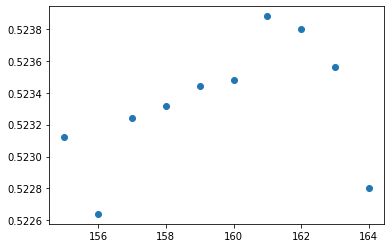

In [48]:
import matplotlib.pyplot as plt
x = ks
y = k_accurracies
plt.scatter(x,y)

In [49]:
print(f"Best k value is {k_best} with accuracy of {k_accuracy_high_score}")

Best k value is 161 with accuracy of 0.52388


In [50]:
from sklearn.neighbors import KNeighborsClassifier
 
# train the model
pipeline = Pipeline([
      ('text_vect', CountVectorizer(binary=True,
      #( 'text_vect', TfidfVectorizer(use_idf=True,
                                    max_features=10)),
      ('knn', KNeighborsClassifier(n_neighbors = 168))  
                                  ])

pipeline.fit(X_train, y_train.values)
y_pred = pipeline.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
 
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[4056 8444]
 [3493 9007]]


In [52]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))
print("Accuracy (validation):", accuracy_score(y_test.values, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.32      0.40     12500
           1       0.52      0.72      0.60     12500

    accuracy                           0.52     25000
   macro avg       0.53      0.52      0.50     25000
weighted avg       0.53      0.52      0.50     25000

Accuracy (validation): 0.52252
